In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)

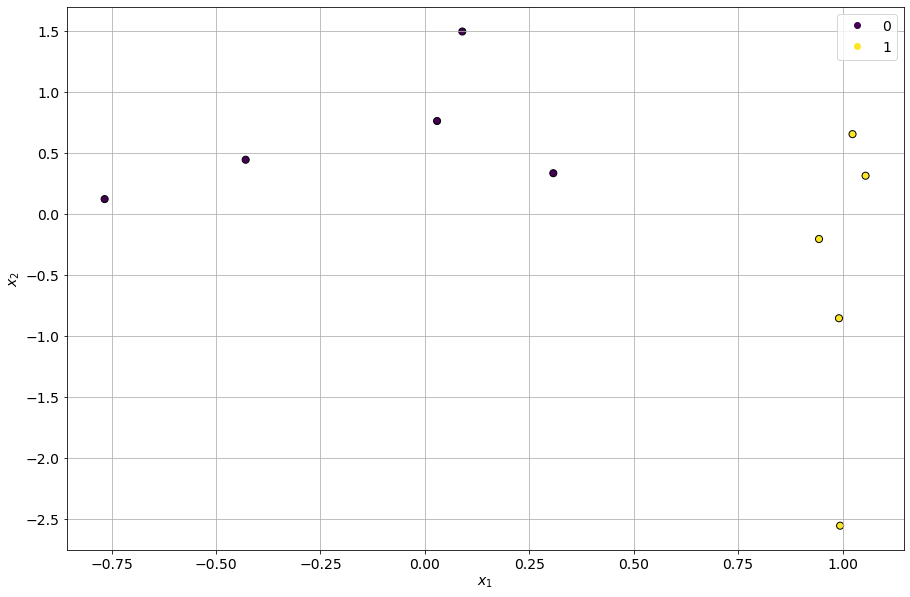

In [2]:
from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=10,
    n_features=2, 
    n_redundant=0,
    n_informative=1, 
    n_clusters_per_class=1,
    random_state=RANDOM_STATE
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [6]:
# TODO - напишите реализацию функции вычисления Джини
def gini_impurity(y):
    gini = 0
    for un_cls in np.unique(y):
        prob = sum(y == un_cls) / len(y)
        gini += prob * (1 - prob)
    return gini

In [7]:
# TEST
y1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y3 = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
y4 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

assert gini_impurity(y1) == 0.5
assert gini_impurity(y2) == 0
assert gini_impurity(y3) == 0.32
assert gini_impurity(y4) == 0
assert gini_impurity(np.array([])) == 0

0.5


In [8]:
# TODO
def predict_v1(X):
    # Напишите реализацию функции предсказания
    #   решающего дерева с одним узлом
    #   разделение по признаку (x1) с порогом 0.5
    # * Не забывайте о размерности данных X
    return np.array(X[:, 0] > 0.5, dtype=int)

In [9]:
# TEST
X = np.array([
    [1, 1],
    [2, 1],
    [0, 1],
])

assert np.all(predict_v1(X) == np.array([1, 1, 0]))

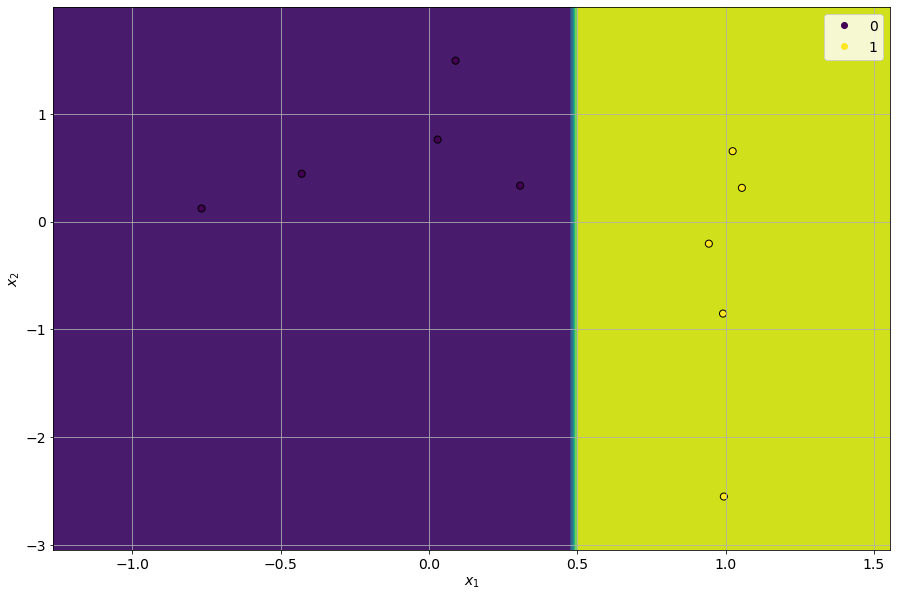

In [10]:
X = X_data
y_true = y_data

x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
space_X = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict_v1(space_X)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
plt.show()

In [12]:
thresholds = [-0.5, 0.5, 1]
feature_index = 0

X = X_data
y_true = y_data

gini_full = gini_impurity(y_true)
print(f'Gini full: {gini_full} | count: {len(y_true)}')

for threshold in thresholds:
    print(f'\tSplit by {threshold}')
    split_mask = X[:, feature_index] > threshold
    y_true_left = y_true[split_mask]
    y_true_right = y_true[~split_mask]
    
    gini_left = gini_impurity(y_true_left)
    gini_right = gini_impurity(y_true_right)

    print(f'\t\tGini left: {gini_left} | element count: {len(y_true_left)}')
    print(f'\t\tGini right: {gini_right} | element count: {len(y_true_right)}')

Gini full: 0.5 | count: 10
	Split by -0.5
		Gini left: 0.49382716049382713 | element count: 9
		Gini right: 0.0 | element count: 1
	Split by 0.5
		Gini left: 0.0 | element count: 5
		Gini right: 0.0 | element count: 5
	Split by 1
		Gini left: 0.0 | element count: 2
		Gini right: 0.46875 | element count: 8


In [14]:
thresholds = [-0.5, 0.5, 1]
feature_index = 0

X = X_data
y_true = y_data

gini_full = gini_impurity(y_true)
print(f'Gini full: {gini_full}')

for threshold in thresholds:
    print(f'\tSplit by {threshold}')
    split_mask = X[:, feature_index] > threshold
    y_true_left = y_true[split_mask]
    y_true_right = y_true[~split_mask]
    
    gini_left = gini_impurity(y_true_left)
    gini_right = gini_impurity(y_true_right)

    print(f'\t\tGini left: {gini_left}')
    print(f'\t\tGini right: {gini_right}')
    
    weight_left = len(y_true_left)/len(y_true)
    weight_right = len(y_true_right)/len(y_true)
    weighted_gini = weight_left * gini_left + weight_right * gini_right
    print(f'\t\tGini after split: {weighted_gini}')
    print(f'\t\tGini gain: {gini_full-weighted_gini}')

Gini full: 0.5
	Split by -0.5
		Gini left: 0.49382716049382713
		Gini right: 0.0
		Gini after split: 0.4444444444444444
		Gini gain: 0.05555555555555558
	Split by 0.5
		Gini left: 0.0
		Gini right: 0.0
		Gini after split: 0.0
		Gini gain: 0.5
	Split by 1
		Gini left: 0.0
		Gini right: 0.46875
		Gini after split: 0.375
		Gini gain: 0.125


In [15]:
def get_best_split(X, y_true):
    best_gini_gain = 0
    best_gini_impurity = 0
    best_feature_idx = 0
    best_threshold = 0

    # TODO - дополните реализацию функции получения наилучшего разделения
    for i_features in range(X.shape[1]):
        for i_rows in range(X.shape[0]):
            threshold = X[i_rows, i_features]
            split_mask = X[:,i_features] > threshold
            y_true_left = y_true[split_mask]
            y_true_right = y_true[~split_mask]

            # Для исключения случае, когда сплит с краю
            if len(y_true_left) == 0 or len(y_true_right) == 0:
                continue

            gini_left = gini_impurity(y_true_left)
            gini_right = gini_impurity(y_true_right)

            weight_left = len(y_true_left)/len(y_true)
            weight_right = len(y_true_right)/len(y_true)
            weighted_gini = weight_left * gini_left + weight_right * gini_right

            gini_gain = gini_full-weighted_gini
            if gini_gain > best_gini_gain:
                best_threshold = threshold
                best_feature_idx = i_features
                best_gini_gain = gini_gain
                best_gini_impurity = weighted_gini

    return best_gini_impurity, best_feature_idx, best_threshold

In [16]:
# TEST
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([1, 1, 1, 1, 0, 0, 0, 1])

best_gini, best_feature_idx, best_threshold = get_best_split(X, y)

assert np.isclose(best_gini, 0.1875)
assert np.isclose(best_threshold, 4)
assert best_feature_idx == 0

In [30]:
best_gini, best_feature_idx, best_threshold = get_best_split(X_data, y_data)

best_gini, best_feature_idx, best_threshold
print(
    f"Best gini impurity:\t{best_gini}",
    f"\nBest feature index:\t{best_feature_idx}",
    f"\nBest threshold value:\t{best_threshold}"
)

Best gini impurity:	0.0 
Best feature index:	0 
Best threshold value:	0.3074493077524587


In [31]:
# TODO
def predict_v2(X, feature_index, threshold):
    # Напишите реализацию функции предсказания
    #   решающего дерева с одним узлом
    #   разделение по признаку (x1) с порогом 0.5
    # *Не забывайте о размерности данных X
    return np.array(X[:, feature_index] > threshold, dtype=int)

In [32]:
# TEST
X = X_data
y_true = y_data

y_pred = predict_v2(X, best_feature_idx, best_threshold)
assert np.all(y_true == y_pred)

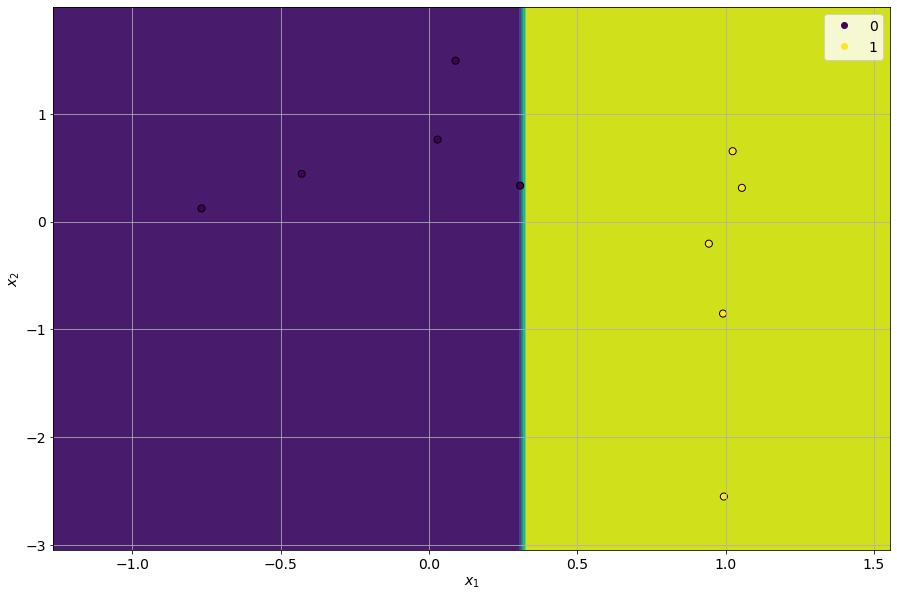

In [33]:
X = X_data
y_true = y_data

x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
space_X = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict_v2(space_X, best_feature_idx, best_threshold)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
plt.show()

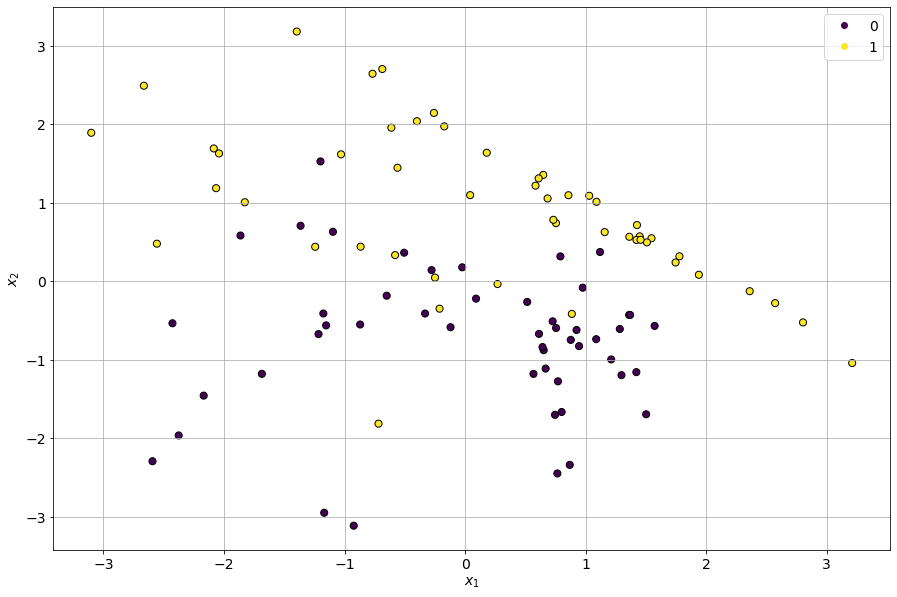

In [34]:
X_data, y_data = make_classification(
    n_samples=100,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=3
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [ ]:
class DecisionLeaf:
    def __init__(self, depth):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина листа, на котором он располагается
        '''
        self.predict_class = None
        self.depth = depth

    def predict(self, X):
        ''' Функция предсказания листа

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний, заполненный значениями
                класса листа
        '''
        # TODO - напишите функцию предсказания
        return np.full(X.shape[0], self.predict_class)

    def fit(self, X, y):
        ''' Метод находит в данных класс с наибольшим количеством записей
            и присваивает его листу как наиболее вероятно 
            предсказываемый класс
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите функцию обучения
        # Выбираем из y наиболее часто встречающееся значение 
        #   и присваиваем self.predict_class
        #   это и будет предсказываемый класс листа
        

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # TODO - напишите функцию возврата глубины, на которой находится лист
        return None

    def print(self):
        ''' Вывод информации о листе '''
        print(f'{self.depth*" "}> Class {self.predict_class}')